## Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset and EDA

In [7]:
df = pd.read_csv('Customers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

<Axes: title={'center': 'Count (target)'}>

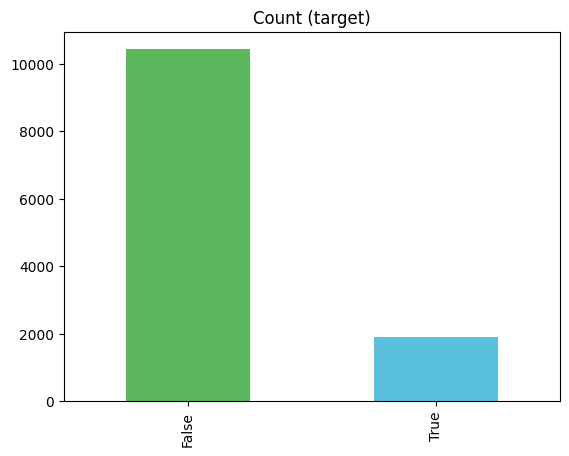

In [9]:
target_count = df['Revenue'].value_counts().sort_index()
target_count.plot(kind='bar', title='Count (target)', color=['#5cb85c','#5bc0de'])

# PreProcess

In [10]:
# Identify and replace NaN values

df['Administrative_Duration'].replace(0, np.nan, inplace=True)
df['Administrative_Duration'] = df['Administrative_Duration'].fillna(df['Administrative_Duration'].median())

df['Informational_Duration'].replace(0, np.nan, inplace=True)
df['Informational_Duration'] = df['Informational_Duration'].fillna(df['Informational_Duration'].median())

df['ProductRelated_Duration'].replace(0, np.nan, inplace=True)
df['ProductRelated_Duration'] = df['ProductRelated_Duration'].fillna(df['ProductRelated_Duration'].median())

In [11]:
# One hot encoding for categorical features
df['Month'] = df['Month'].astype('category')
df['VisitorType'] = df['VisitorType'].astype('category')

df = pd.get_dummies(df, columns = ['Month','VisitorType'])

# encode binary features
df['Weekend'] = df['Weekend'].astype('category')
df['Weekend'] = df['Weekend'].cat.codes

df['Revenue'] = df['Revenue'].astype('category')
df['Revenue'] = df['Revenue'].cat.codes


In [12]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

# train a simple model

In [13]:
from sklearn.model_selection import train_test_split 

In [14]:
X_train, X_test, y_train,y_test = train_test_split(df[list(set(df.columns)-set('Revenue'))], df.Revenue, test_size=0.2, random_state=42,stratify=df.Revenue)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def has_user_purchased(x):
    return 1 if x else -1

df['has_purchased'] = df['Revenue'].apply(lambda x: has_user_purchased(x))
X_train, X_test, y_train,y_test = train_test_split(df[list(set(df.columns)-set('Revenue'))], df.Revenue, test_size=0.2, random_state=42,stratify=df.Revenue)

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'MSE on validation set = {mean_squared_error(y_test, y_pred)}')
decision = ['purchased' if pred > 0 else 'not purchased' for pred in y_pred]

MSE on validation set = 5.4720202606252736e-30


In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Text(0.5, 1.0, 'PCA of dataset')

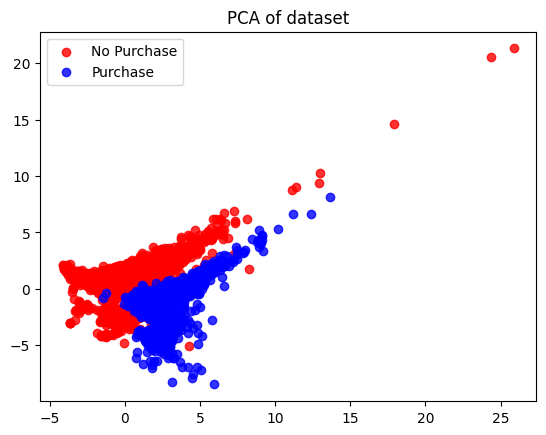

In [17]:
X_scaled = StandardScaler().fit_transform(X_train)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure()
colors = ['r', 'b']
target_names = ['No Purchase', 'Purchase']

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_pca[y_train == i, 0], X_pca[y_train == i, 1], color=color, alpha=.8,
                label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of dataset')


Text(0.5, 0.85, '90% cut-off threshold')

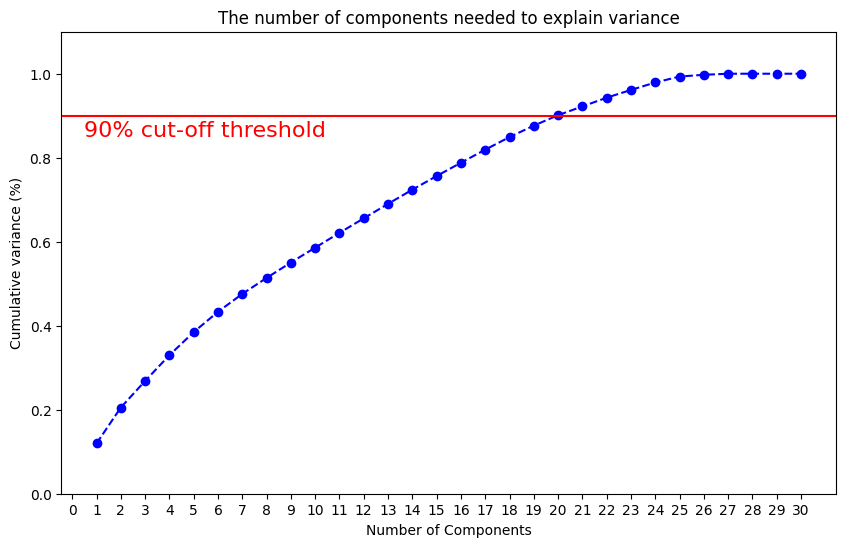

In [18]:
pca = PCA(random_state=42)
pca.fit(StandardScaler().fit_transform(X_train))

xi = np.arange(1, len(X_train.columns)+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10,6))
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, len(X_train.columns)+1, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.9, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)

In [19]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(21)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [20]:
from imblearn.over_sampling import SMOTE # for over-sampling

In [22]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [23]:
df = pd.DataFrame(data = X_sm)
finalDf = pd.concat([df, y_sm], axis=1)

In [24]:
finalDf[finalDf.columns[-1]]

0        0
1        0
2        0
3        1
4        1
        ..
16671    1
16672    1
16673    1
16674    1
16675    1
Name: Revenue, Length: 16676, dtype: int8

<Axes: title={'center': 'Count (target)'}>

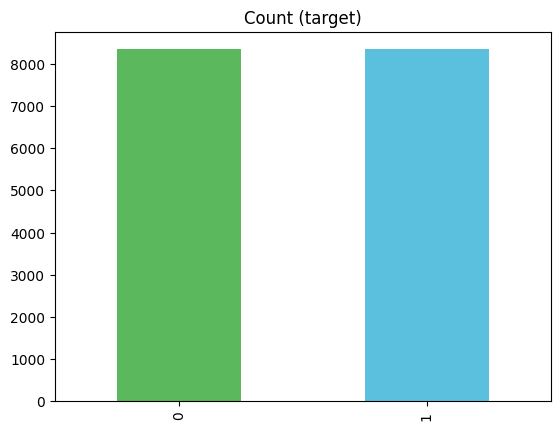

In [25]:
finalDf[finalDf.columns[-1]].value_counts().sort_index().plot(kind='bar', title='Count (target)', color=['#5cb85c','#5bc0de'])

## Training Classifiers

In [29]:
from sklearn import model_selection # for selecting cross validation method
from sklearn.model_selection import KFold # for k-fold split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

#models
from sklearn.ensemble._forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [30]:
clf1 = SVC(probability=True, random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = knn()
clf4 = LogisticRegression(random_state=42)

models = {'SVC': clf1, 'Decision Tree': clf2, 'KNN': clf3, 'Logistic Regression': clf4}

params = {'SVC': {'kernel': ['sigmoid', 'linear', 'poly', 'rbf']},
            'Decision Tree': {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
            'KNN': {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
            'Logistic Regression': {'C': [0.1, 1, 10, 100, 1000]}}

In [31]:
def find_models_scores(X_train, scoring, cv):
    models_scores = {}

    for model_name, model in models.items():
    
        param_grid = { k: v for k, v in params[model_name].items()}
        print(param_grid)
    
        grid_search = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=cv, n_jobs=-1, verbose=1)
        
        grid_search.fit(X_train, y_train)

        print(f'Best parameters for {model_name}: ', grid_search.best_params_)

        best_model = grid_search.best_estimator_
        

        scores = cross_validate(model, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)

        models_scores[model_name] = {s:scores[f'test_{s}'].mean() for s in scoring}


    return models_scores


scoring = {'accuracy': 'accuracy',
            'precision': 'precision',
            'roc_auc': 'roc_auc',
            'f1': 'f1'}

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

models_scores = find_models_scores(X_train, scoring,cv)

{'kernel': ['sigmoid', 'linear', 'poly', 'rbf']}
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for SVC:  {'kernel': 'poly'}
{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Decision Tree:  {'max_depth': 7}
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for KNN:  {'n_neighbors': 3}
{'C': [0.1, 1, 10, 100, 1000]}
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for Logistic Regression:  {'C': 10}


<Figure size 640x480 with 0 Axes>

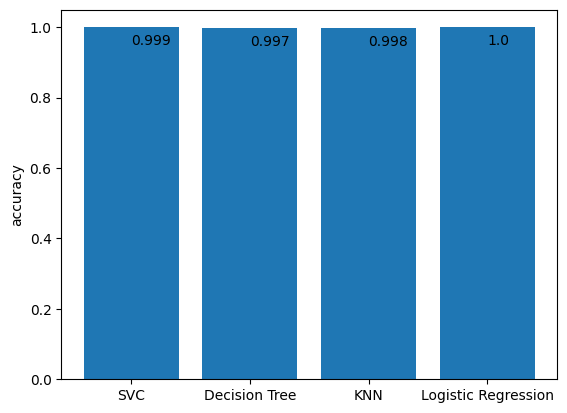

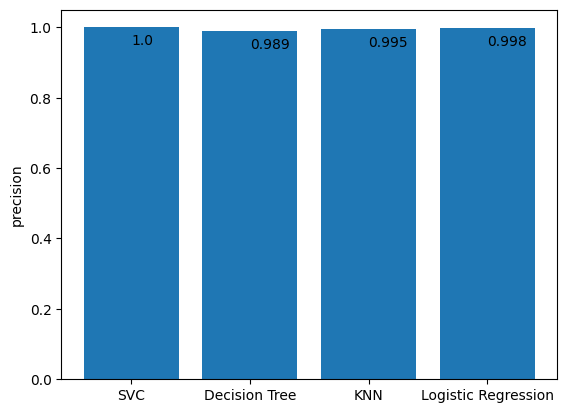

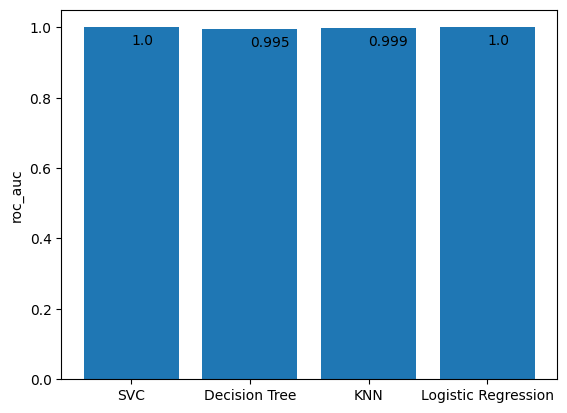

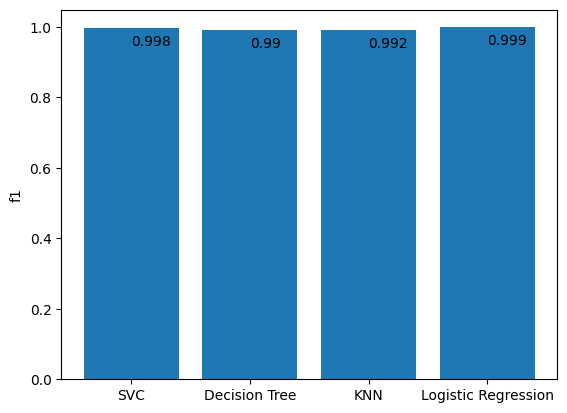

In [32]:
def show_scoring(models_scores, scoring=['accuracy', 'precision', 'roc_auc', 'f1'], label=''):
    for score in scoring:

        if len(scoring) > 1:
            plt.figure()
        metric = [model_score[score] for model_score in models_scores.values()]
        plt.bar(models_scores.keys(), metric, label=label)
        plt.ylabel(score)
        # add value on top of each bar
        for i, v in enumerate(metric):
            plt.text(i, v-0.05, str(round(v, 3)))
plt.figure()
show_scoring(models_scores)

In [43]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [38]:
model = SVC(kernel = 'rbf')
model.fit( X_sm, y_sm )
y_true, y_pred = y_test , model.predict(X_test)

print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2084
           1       1.00      1.00      1.00       382

    accuracy                           1.00      2466
   macro avg       1.00      1.00      1.00      2466
weighted avg       1.00      1.00      1.00      2466



In [48]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

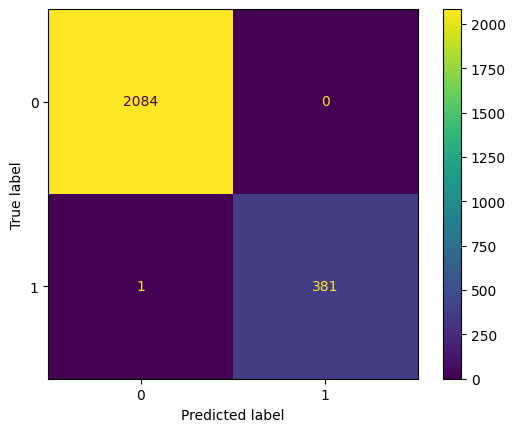

In [50]:
disp.plot();